# Import Statements

In [1]:
import pandas as pd
import string
from nltk.tag import pos_tag
from IPython.display import display 
import matplotlib.pyplot as plt
%matplotlib inline

# Build Dataframe

In [2]:
df = pd.read_csv("part-r-00000", delimiter="\t", header=None) # read in data
df.columns = ['word','count'] # set column names
df['word'] = df['word'].str.replace('[{}]'.format(string.punctuation), '') # remove extraneous punctuation
df = df.groupby(df['word']).aggregate({'count': 'sum'}).reset_index() # merge same words
df = df[df['word'] != ""] # remove blanks
# get list of all nouns and adjectives in the dataframe using nltk
nouns_and_adjectives = [word for word,pos in pos_tag(df['word'].tolist()) if pos == 'NN' or pos == 'JJ']
# filter dataframe to just nouns and adjectives
df = df[df['word'].isin(nouns_and_adjectives)].sort_values(by=['count'],ascending=False)\
    .reset_index(drop=True).head(10)
display(df) # display the dataframe

,word,count
0,thou,4886
1,thy,3876
2,thee,3365
3,good,2389
4,lord,2183
5,man,1840
6,sir,1837
7,hath,1746
8,know,1645
9,let,1447


# Create Pareto Plot

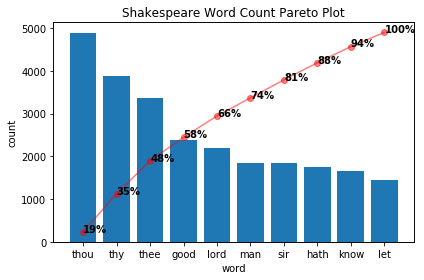

In [3]:
# for this, I used Tyler Marrs' Pareto plot example: https://tylermarrs.com/posts/pareto-plot-with-matplotlib/
title = "Shakespeare Word Count Pareto Plot"
xlabel = "word"
ylabel = "count"
x = df['word'].values
y = df['count'].values
weights = y / y.sum()
cumsum = weights.cumsum()
fig, ax1 = plt.subplots()
ax1.bar(x, y)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax2 = ax1.twinx()
ax2.plot(x, cumsum, '-ro', alpha=0.5)
ax2.set_ylabel('', color='r')
ax2.tick_params('y', colors='r')
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax2.set_yticks([])
formatted_weights = ['{0:.0%}'.format(x) for x in cumsum]
for i, txt in enumerate(formatted_weights):
    ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
plt.title(title)
plt.tight_layout()
plt.show()